## Bài tập:
### Link dataset : https://www.kaggle.com/datasets/swathisrinarayana/diabetes2

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

#### Khảo sát dataset

In [192]:
data = pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [193]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Thống kê mô tả quan trọng của các biến

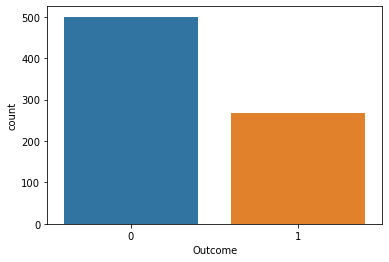

In [194]:
sns.countplot(x= 'Outcome', data= data) #Thống kê số lượng bệnh nhân bị bệnh và không bị bệnh

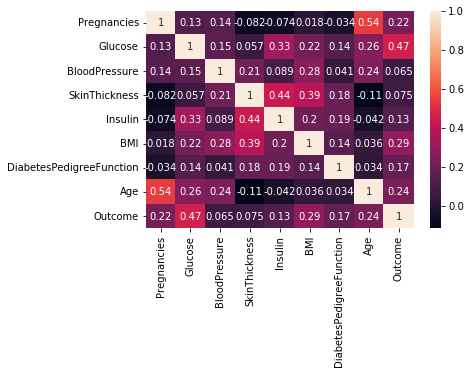

In [195]:
sns.heatmap(data.corr(), annot=True) # Biểu đồ tương quan

Nhận xét : Sự tương quan giữa các biến so với biến cần dự đoán (Outcome) cao như "Age" "Glucose" "BMI" 
vì vậy ở bài này chúng ta sẽ dùng 3 biến trên

In [196]:
data = pd.read_csv('diabetes2.csv', usecols=['Glucose', 'BMI', 'Age', 'Outcome']) # Lọc những biến không cần thiết

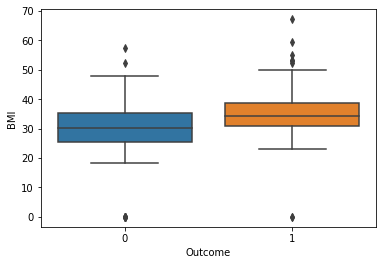

In [197]:
sns.boxplot(x="Outcome", y="BMI", data=data) 

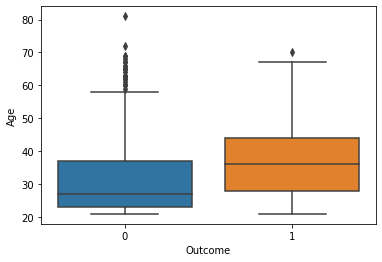

In [198]:
sns.boxplot(x="Outcome", y="Age", data=data)

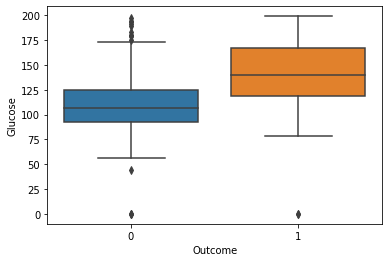

In [199]:
sns.boxplot(x="Outcome", y="Glucose", data=data)

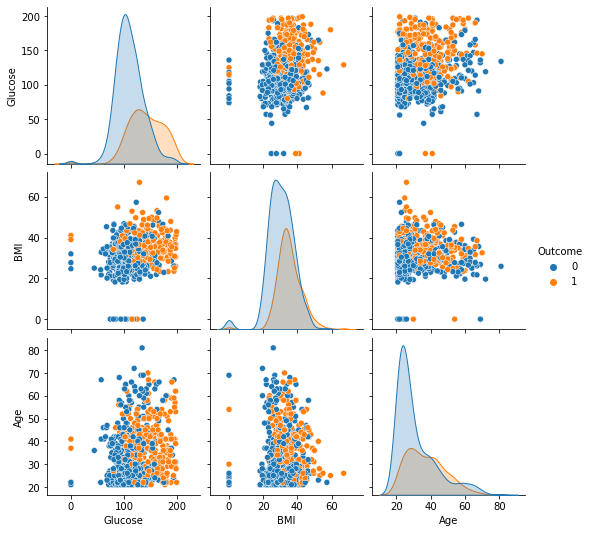

In [200]:
sns.pairplot(data, hue='Outcome')

Nhận xét :
- có thể phân loại đc dựa vào các cặp đặc trưng đã chọn

#### Biểu đồ xác xuất và histogram

In [201]:
def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist() # histogram
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=plt)# prob plot
    plt.show()

#### Dữ liệu trước và sau khi xử lí ngoại lệ

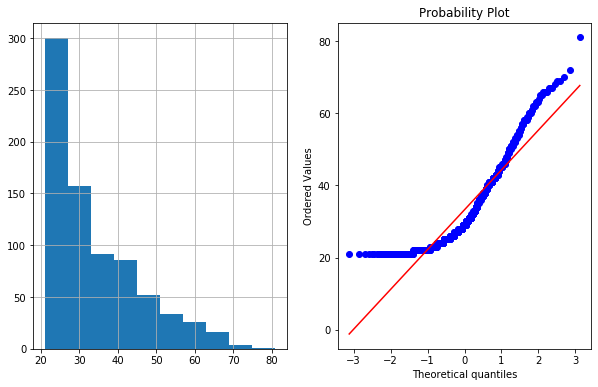

In [202]:
plot_data(data,'Age')

Biểu đồ xác xuất của biến Age thể hiện biến này phân bố lệch

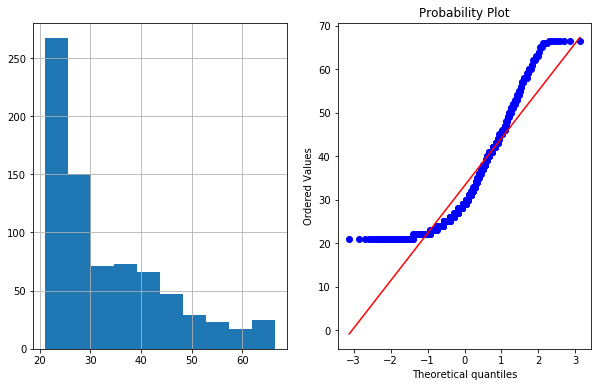

In [203]:
IQR = data["Age"].quantile(0.75) - data["Age"].quantile(0.25)
lower_age = data['Age'].quantile(0.25) - 1.5*IQR
upper_age = data['Age'].quantile(0.75) + 1.5*IQR
data.loc[data['Age'] >= upper_age, 'Age'] = upper_age
plot_data(data,'Age')

Dữ liệu đã gần phân bố chuẩn hơn

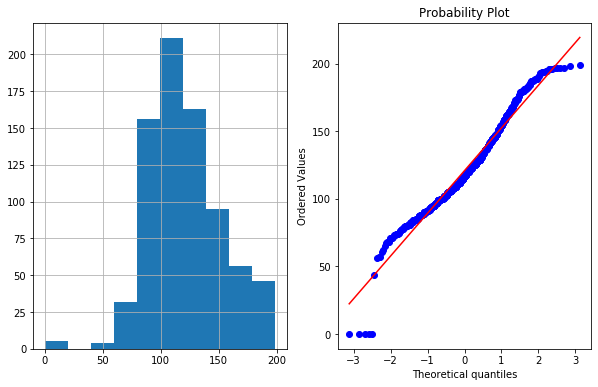

In [204]:
plot_data(data,'Glucose')

Biểu đồ xác xuất của biến Glucose thể hiện biến này phân bố  chuẩn

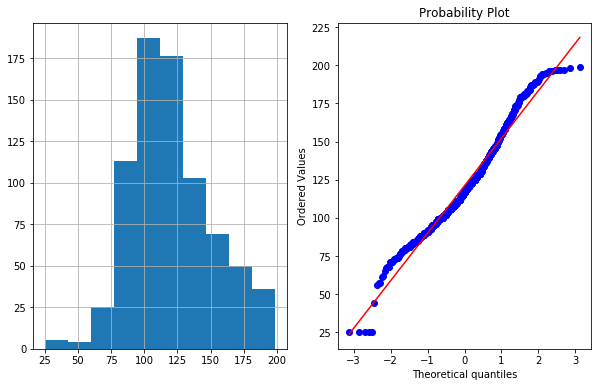

In [205]:
upper_Glucose = data['Glucose'].mean() + 3 * data['Glucose'].std()
lower_Glucose = data['Glucose'].mean() - 3 * data['Glucose'].std()
data.loc[data['Glucose'] >= upper_Glucose, 'Glucose'] = upper_Glucose
data.loc[data['Glucose'] <= lower_Glucose, 'Glucose'] = lower_Glucose
plot_data(data,'Glucose')

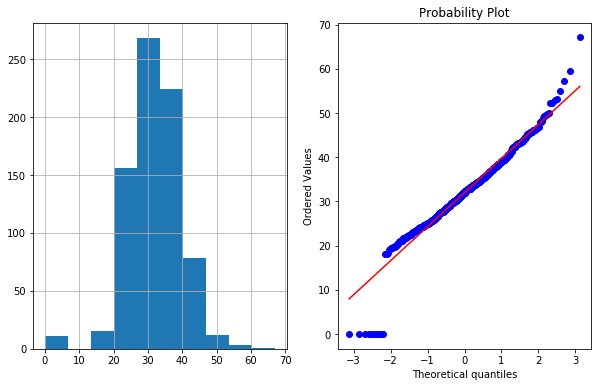

In [206]:
plot_data(data,'BMI')

Biểu đồ xác xuất cho thấy biến BMI tuân theo phân bố chuẩn

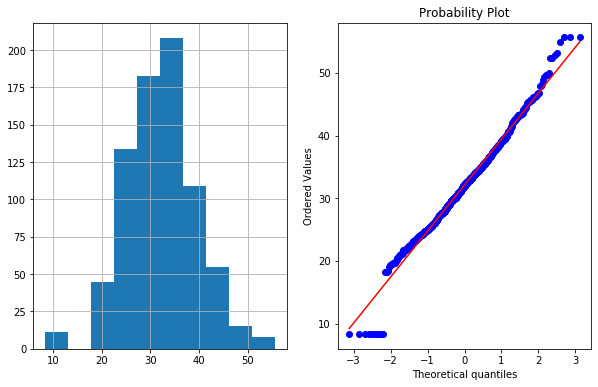

In [207]:
upper_BMI = data['BMI'].mean() + 3 * data['BMI'].std()
lower_BMI = data['BMI'].mean() - 3 * data['BMI'].std()
data.loc[data['BMI'] >= upper_BMI, 'BMI'] = upper_BMI
data.loc[data['BMI'] <= lower_BMI, 'BMI'] = lower_BMI
plot_data(data,'BMI')

#### Logistic Regression
- test_size = 0.3
- random_state = [0, 9]

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def Logistic_Reg(data):
    acc_scores = []
    for i in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(
            data[['Age', 'Glucose', 'BMI']],
            data['Outcome'],test_size=0.3, 
            random_state=i)
        classifier = LogisticRegression()
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        acc_scores.append(accuracy_score(Y_test, Y_pred))
    return round(np.mean(acc_scores) * 100, 2)

#### Chuẩn hóa theo z_Scrore

In [209]:
from sklearn.preprocessing import StandardScaler
def chuanHoa(data):
      z_scrore= StandardScaler()
      data1 = data[["Glucose", "BMI","Age"]].copy()
      #data1["Age"] = np.log1p(data["Age"])
      #data1.fillna(np.mean(data1["Age"]))
      data1=pd.DataFrame(z_scrore.fit_transform(data1),columns=data1.columns)
      data1["Outcome"] = data["Outcome"]
      return data1


In [210]:
print('accuracy_score before:', Logistic_Reg(data), '%')
print('accuracy_score after:', Logistic_Reg(chuanHoa(data)), '%')

accuracy_score before: 76.71 %
accuracy_score after: 76.8 %


Nhận xét:
- Ảnh hưởng của outlier của các biến là đáng kể
- Chuẩn hóa chưa cải thiện độ chính xác nhiều ( chỉ 0.04% ) ( chưa rõ lý do )
- Chưa áp dụng đc siêu tham số nên độ chính xác chưa cao